**Brian Blaylock**  
*September 20, 2021*

# 🗺 Add common features to your maps with `cartopy_tools2`
When I first learned cartopy, it was difficult to know how to add things to a map. Now that I am more experienced, I know what I like to put on my maps to build the base layer. Instead of recoding all these tasks of adding different features, I simplified and put all these feature layers into functions in my `common_features` class. Now I can create a cartopy axes and add different features to it, or add features to an existing cartopy axes.

One common line I dislike typing so much is `ccrs.PlateCarree()`. Lucky for you, this value is stored in the variable `pc` in cartopy_tools and can be imported.

In [1]:
import matplotlib.pyplot as plt

from toolbox.cartopy_tools2 import common_features, pc, ccrs

## 🐰 Quickly create a Cartopy axes, add features, and change feature style
There are two ways to initalize the `common_features` class. By default, the COASTLINES method is always called.

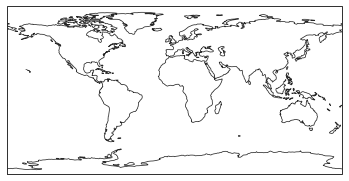

In [7]:
# m is for "map", this returns a class instance
m = common_features()
m

<GeoAxesSubplot:>

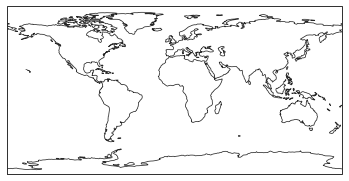

In [8]:
# But you most likely want to interacti with the axis object
ax = common_features().ax
ax

You can add additional features and adjust parameters for it. Just remember to ask for the `ax` property at the end.

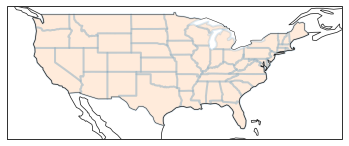

In [21]:
# Add STATES feature, and adjust the display arguments
ax = (
    common_features()
    .STATES(edgecolor="tab:blue", linewidth=2, facecolor="tab:orange")
    .BORDERS()
    .ax
)
ax.set_extent([-130, -60, 23, 45])

You can even specify the projection, and then plot things on the returned axes.

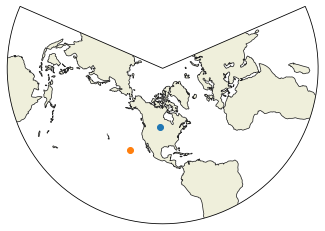

In [22]:
# LambertConformal Projection
ax = common_features(crs=ccrs.LambertConformal()).LAND().ax

# Add single points
ax.scatter(-100, 50, transform=pc)
ax.scatter(-130, 20, transform=pc)

ax.set_global()

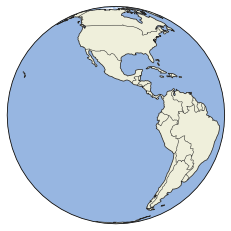

In [24]:
# Geostationary Projection
crs = ccrs.Geostationary(central_longitude=-100)
ax = common_features(crs=crs).BORDERS().OCEAN().LAND()

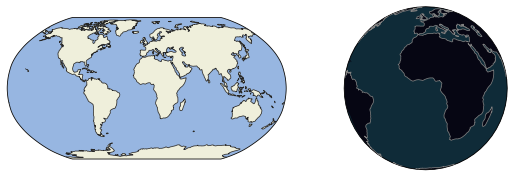

In [25]:
# There is even a dark themed map!

fig = plt.figure(figsize=(10,3))
ax1 = fig.add_subplot(1, 2, 1, projection=ccrs.Robinson())
ax2 = fig.add_subplot(1, 2, 2, projection=ccrs.Geostationary())

common_features(ax=ax1).OCEAN().LAND()
common_features(ax=ax2, dark=True).OCEAN().LAND()

plt.subplots_adjust(wspace=0)

## 📚 Summary of `common_features`
By default, `COASTLINES=True` to always plot coastlines, but you can set that to False if it's not needed.

<div class="alert alert-info">
Note: You may change the Stamen zoom level in the <i>STAMEN_kwargs</i>.
</div>


In [35]:
a = [
    'COASTLINES',
    'BORDERS',
    'STATES',
    #'COUNTIES',
    'OCEAN',
    #'LAND',
    #'RIVERS',
    #'LAKES',
    #'ROADS',
    #'STAMEN',   
]

<urlopen error [Errno 110] Connection timed out>


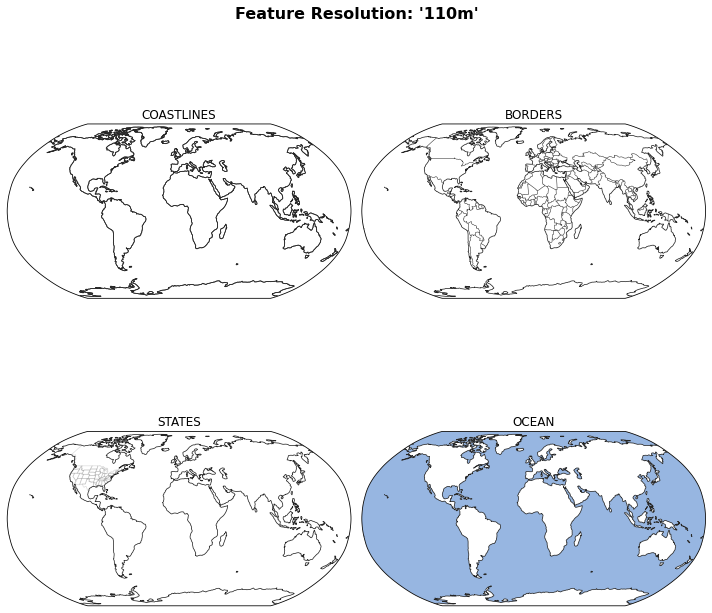

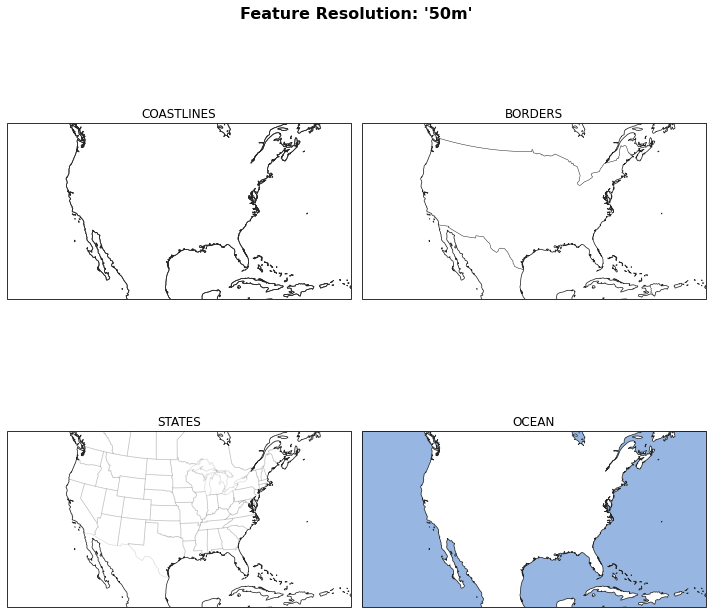

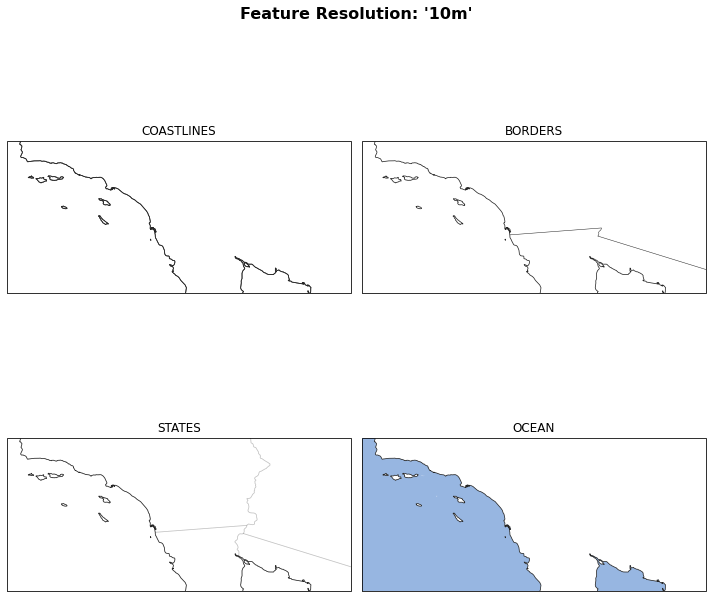

<urlopen error [Errno 110] Connection timed out>
<urlopen error [Errno 110] Connection timed out><urlopen error [Errno 110] Connection timed out><urlopen error [Errno 110] Connection timed out><urlopen error [Errno 110] Connection timed out><urlopen error [Errno 110] Connection timed out>
<urlopen error [Errno 110] Connection timed out>

<urlopen error [Errno 110] Connection timed out>
<urlopen error [Errno 110] Connection timed out>



<urlopen error [Errno 110] Connection timed out><urlopen error [Errno 110] Connection timed out><urlopen error [Errno 110] Connection timed out><urlopen error [Errno 110] Connection timed out><urlopen error [Errno 110] Connection timed out><urlopen error [Errno 110] Connection timed out><urlopen error [Errno 110] Connection timed out>






<urlopen error [Errno 110] Connection timed out>
<urlopen error [Errno 110] Connection timed out>
<urlopen error [Errno 110] Connection timed out>
<urlopen error [Errno 110] Connection timed out>
<urlopen error [Errn

/p/home/blaylock/anaconda3/envs/basic38/lib/python3.8/site-packages/PIL/Image.py:962: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


<urlopen error [Errno 110] Connection timed out><urlopen error [Errno 110] Connection timed out><urlopen error [Errno 110] Connection timed out>


<urlopen error [Errno 110] Connection timed out><urlopen error [Errno 110] Connection timed out><urlopen error [Errno 110] Connection timed out><urlopen error [Errno 110] Connection timed out>



<urlopen error [Errno 110] Connection timed out>
<urlopen error [Errno 110] Connection timed out>
<urlopen error [Errno 110] Connection timed out>
<urlopen error [Errno 110] Connection timed out>
<urlopen error [Errno 110] Connection timed out>
<urlopen error [Errno 110] Connection timed out>
<urlopen error [Errno 110] Connection timed out>
<urlopen error [Errno 110] Connection timed out><urlopen error [Errno 110] Connection timed out><urlopen error [Errno 110] Connection timed out><urlopen error [Errno 110] Connection timed out><urlopen error [Errno 110] Connection timed out>
<urlopen error [Errno 110] Connection timed out>


<urlopen error [Errno 

In [36]:
for res, crs in zip(['110m', '50m', '10m'], [ccrs.Robinson(), ccrs.LambertConformal(), pc]):
    plt.figure(figsize=(10,10))
    for i, feature in enumerate(a, 1):
        nrows = int(len(a)/2)
        ax = plt.subplot(nrows, 2, i, projection=crs)
        
        #getattr(common_features(), 'STATES')()
        getattr(common_features(res, ax=ax), feature)()
        
        if res == '50m':
            ax.set_extent([-130, -60, 20, 50], ccrs.PlateCarree())
        elif res == '10m':
            ax.set_extent([-121, -112, 31, 35], ccrs.PlateCarree())
            
        ax.set_title(feature)

    plt.suptitle(f"Feature Resolution: '{res}'",
                 fontsize=16, ha='center',
                 fontweight='semibold')
    plt.subplots_adjust(wspace=-.26)
    plt.tight_layout()
    plt.savefig(f'../images/features_summary_{res}', bbox_inches='tight')

## 🌓 Light and Dark themed maps

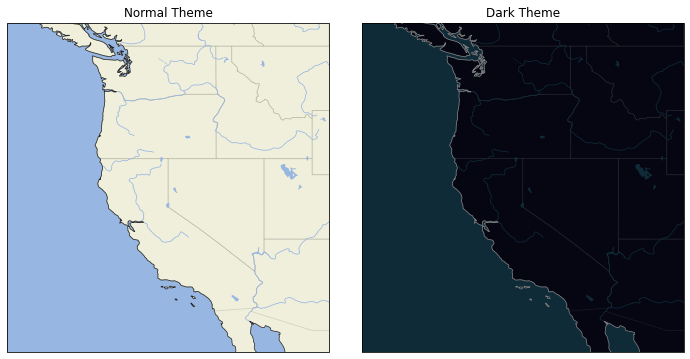

In [28]:
add_features = dict(
    COASTLINES=True,
    OCEAN=True,
    LAND=True,
    STATES=True,
    RIVERS=True,
    LAKES=True
)


fig, (ax1, ax2) = plt.subplots(1, 2, subplot_kw={'projection': pc}, figsize=[10,5])

for ax in (ax1, ax2):
    ax.set_extent([-130, -110, 30, 50])

common_features('50m', ax=ax1).OCEAN().LAND().STATES().RIVERS().LAKES()
ax1.set_title('Normal Theme')


common_features('50m', ax=ax2, dark=True).OCEAN().LAND().STATES().RIVERS().LAKES()
ax2.set_title('Dark Theme')

plt.tight_layout()
plt.savefig(f'../images/light-dark', bbox_inches='tight')

## 🛣 Roads
All major roads, from the Natural Earth feature

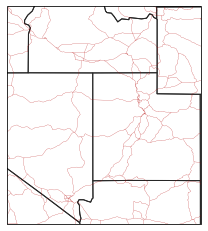

In [34]:
ax = common_features().STATES(linewidth=1, alpha=1).ROADS().ax
ax.set_extent([-118, -109, 35, 45])

You may separate by road type

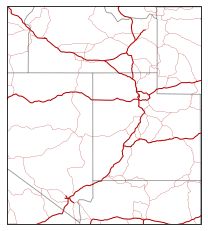

In [37]:
ax = common_features().STATES().ROADS(road_types=['Major Highway'], linewidth=1).ax
ax = common_features().STATES().ROADS(road_types=['Secondary Highway']).ax

ax.set_extent([-118, -109, 35, 45])

## 🏙 Label Major Cities

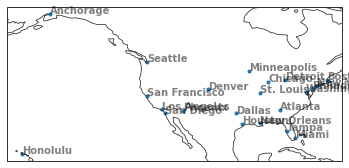

In [2]:
ax = common_features().PLACES(scatter=True)

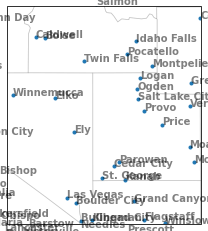

In [9]:
# Large cities have small rank 
# Small cities have large rank
ax = common_features().STATES().PLACES(rank=7).ax

ax.set_extent([-118, -109, 35, 45])

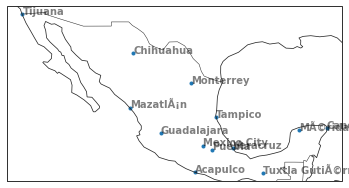

In [13]:
ax = common_features().BORDERS().PLACES(rank=3, country='Mexico')

# ⏹ Modify the map extent
These methods are attached to the ax instance
- ax.center_extent()
- ax.adjust_extent()
- ax.copy_extent()

## Center Extent
When you create a map, it shows the global extent

<GeoAxesSubplot:>

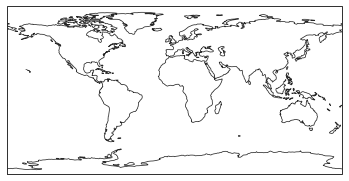

In [16]:
ax = common_features().ax
ax

you can center the map at a point with `center_extent`

(-124.99999999999999, -115.0, 35.0, 45.0)

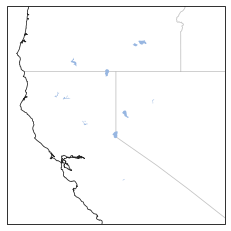

In [17]:
ax = common_features('10m').STATES().LAKES().ax
ax.center_extent(lat=40, lon=-120)

(-121.5, -118.49999999999999, 38.5, 41.5)

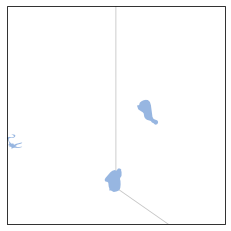

In [18]:
m = common_features('10m').STATES().LAKES()
m.ax.center_extent(lat=40, lon=-120, pad=1.5)   # Adjust the padding to zoom in or out.

You can center the map on a state's centroid...

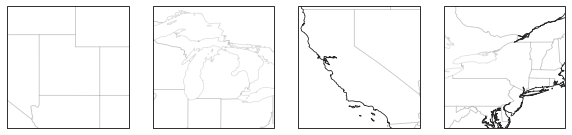

In [20]:
states = ['UT', 'MI', 'CA', 'NY']
fig, axes = plt.subplots(1, len(states), subplot_kw={'projection': pc}, figsize=[10,5])

for ax, st in zip(axes, states):
    common_features('10m', ax=ax).STATES()
    ax.center_extent(state=st)

You can also center the map on a major city

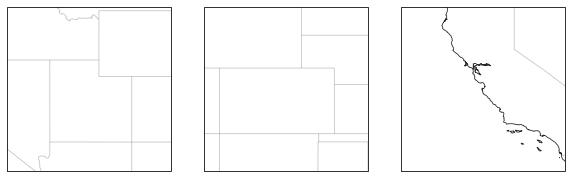

In [21]:
cities = ['Provo', 'Denver', 'Monterey']
fig, axes = plt.subplots(1, len(cities), subplot_kw={'projection': pc}, figsize=[10,5])

for ax, city in zip(axes, cities):
    common_features('10m', ax=ax).STATES()
    ax.center_extent(city=city)

You may also adjust the extent with `adjust_extent`. This is useful if cartopy has auto zoomed on an area after you plotted a point. The pad amount is in the crs coordinates. For PlateCarree this is in degrees. 

(-115.49999999999999, -84.5, 27.799999999999997, 52.2)

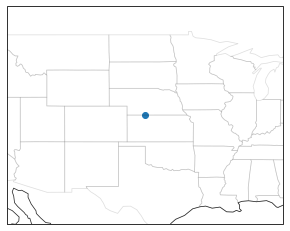

In [23]:
ax = common_features().STATES().ax
ax.scatter(-100, 40)
ax.adjust_extent(pad=10)

(-115.49999999999999, -84.5, 37.25, 42.75)

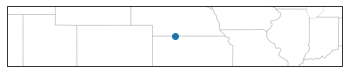

In [24]:
ax = common_features().STATES().ax
ax.scatter(-100, 40)
ax.adjust_extent(pad=dict(left=10, right=10))

You may also center the extent on a city from the "populated places" Natural Earth dataset

(-121.22748987000001, -111.22748987000001, 38.6085901073, 48.6085901073)

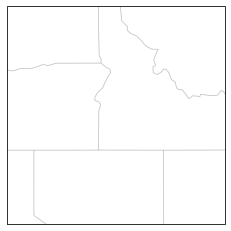

In [25]:
ax = common_features().STATES().ax
ax.scatter(-100, 40)
ax.center_extent(city='Boise')

You can also copy an extent to another map

(-124.99999999999999, -115.0, 35.0, 45.0)

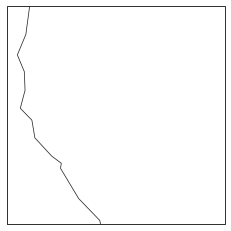

In [27]:
# Create an initial map and adjust the extent
ax1 = common_features().ax
ax1.center_extent(lat=40, lon=-120)

(-124.99999999999999, -115.0, 35.0, 45.0)

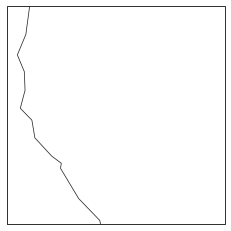

In [28]:
#copy the extent from ax1 to ax2

ax2 = common_features().ax
ax2.copy_extent(ax1)

# 🔲 Domain Border
Add a domain border with `domain_border` from an xarray Dataset that has `latitude` and `longitude` coordinates. The x and y values must be 2D arrays of the grid you want to plot. This is useful for showing the extent of a model domain.

In [2]:
from herbie.archive import Herbie
from toolbox.cartopy_tools import domain_border

/p/home/blaylock/BB_python/Carpenter_Workshop/toolbox/cartopy_tools.py:242: AccessorRegistrationWarning: registration of accessor <class 'toolbox.cartopy_tools.xr_to_cartopy'> under name 'xmap' for type <class 'xarray.core.dataset.Dataset'> is overriding a preexisting attribute with the same name.
  class xr_to_cartopy:


In [3]:
# Get some HRRR model as an xarray DataSet
H = Herbie('2021-04-02').xarray('TMP:2 m')

/p/home/blaylock/BB_python/Herbie/herbie/archive.py:204: UserWarning: `product` not specified. Will use ["sfc"].
  warnings.warn(f'`product` not specified. Will use ["{self.product}"].')


🏋🏻‍♂️ Found 2021-Apr-02 00:00 UTC F00 [HRRR] [product=sfc] GRIB2 file from aws and index file from aws.                                                                                                                                                       
📇 Download subset: [HRRR] model [sfc] product run at 2021-Apr-02 00:00 UTC F00                                                            
 cURL from https://noaa-hrrr-bdp-pds.s3.amazonaws.com/hrrr.20210402/conus/hrrr.t00z.wrfsfcf00.grib2
   1: GRIB_message=71  TMP:2 m above ground:anl


<GeoAxesSubplot:>

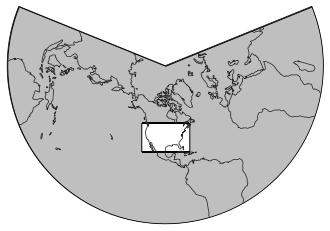

In [4]:
ax = common_features(crs=H.herbie.crs).DOMAIN(H).ax
ax

/p/home/blaylock/anaconda3/envs/basic38/lib/python3.8/site-packages/cartopy/mpl/geoaxes.py:1702: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  X, Y, C, shading = self._pcolorargs('pcolormesh', *args,


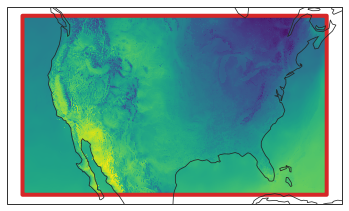

In [5]:
ax = common_features(crs=H.herbie.crs).DOMAIN(H, method='border', edgecolor='tab:red', lw=4).ax

ax.pcolormesh(H.longitude, H.latitude, H.t2m, transform=pc)

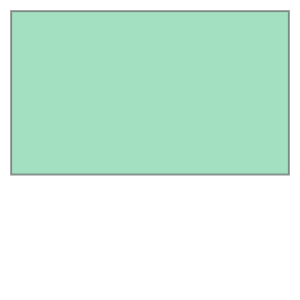

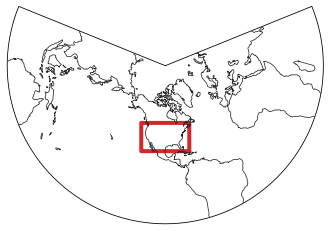

In [9]:
m = common_features(crs=H.herbie.crs).DOMAIN(H, method='border', edgecolor='tab:red', lw=4)
m.domain_polygon